<a href="https://colab.research.google.com/github/norannali/norannali/blob/master/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 69.5MB/s]


In [ ]:
!unzip -q telco-customer-churn.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


We found that [TotalCharges] is object but it contain numeric values,and has (space)values want to handel with

In [ ]:
#CustomerID
df.drop("customerID",axis=1,inplace=True)
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [ ]:
df.TotalCharges.value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
6849.4,1
692.35,1
130.15,1


In [ ]:
df[df['TotalCharges']==" "].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
OnlineBackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


In [ ]:
# Coverting the total charge column to numeric
df["TotalCharges"] = df["TotalCharges"].apply(pd.to_numeric, errors="coerce")

In [ ]:
len(df[df['TotalCharges']==" "])

0

In [ ]:
len(df[df["TotalCharges"].isna()])

11

<Axes: >

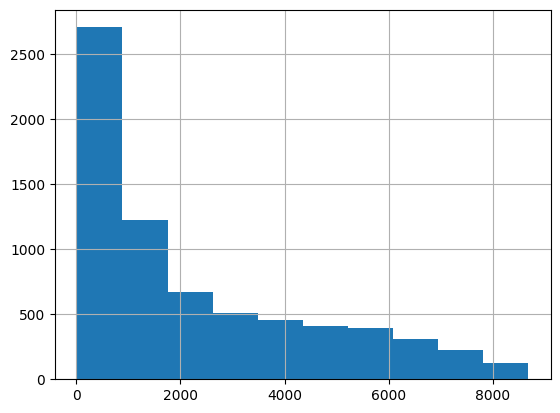

In [ ]:
df["TotalCharges"].hist()

In [ ]:
#Skwed distribution -->Median
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].median())

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.columns=df.columns.str.lower()

In [ ]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
df.churn.value_counts()

,count
churn,
No,5174
Yes,1869


In [ ]:
le=LabelEncoder()
df["churn"]=le.fit_transform(df["churn"])

In [ ]:
df.churn.value_counts() #Imalanced Data

,count
churn,
0,5174
1,1869


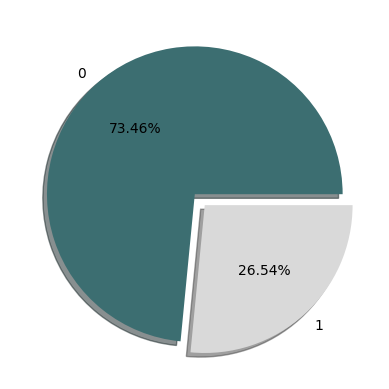

In [ ]:
plt.pie(x=df['churn'].value_counts().values,labels=df['churn'].value_counts().index,autopct='%.02f%%',explode=[0, 0.1],
    shadow=True,colors=['#3c6e71','#d9d9d9'])
plt.show()

In [ ]:
df['seniorcitizen'].value_counts()

,count
seniorcitizen,
0,5901
1,1142


In [ ]:
df['seniorcitizen']=df['seniorcitizen'].astype('object')

In [ ]:
categorical_cols=df.select_dtypes(include="object").columns
categorical_cols

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [ ]:
numerical_cols=df.select_dtypes(exclude="object").columns
numerical_cols

Index(['tenure', 'monthlycharges', 'totalcharges', 'churn'], dtype='object')

In [ ]:
df[categorical_cols].nunique()

,0
gender,2
seniorcitizen,2
partner,2
dependents,2
phoneservice,2
multiplelines,3
internetservice,3
onlinesecurity,3
onlinebackup,3
deviceprotection,3


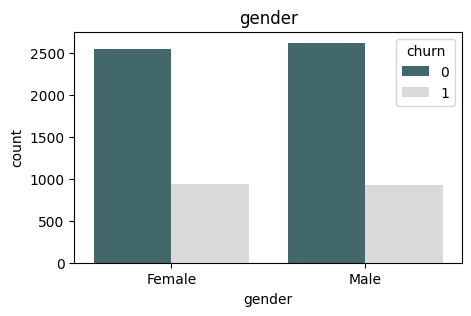

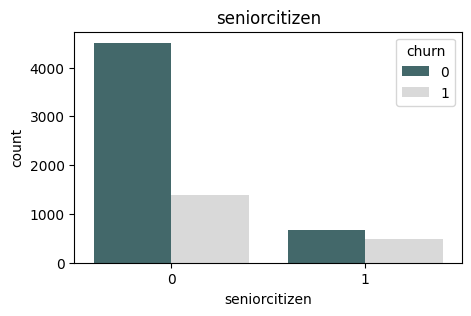

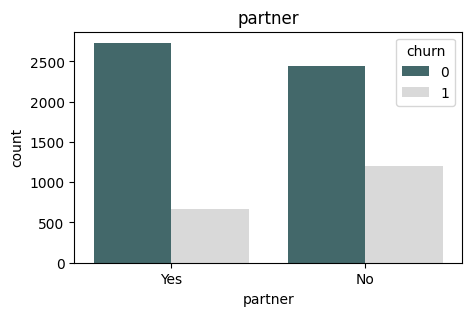

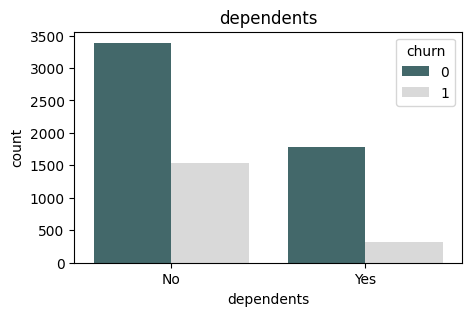

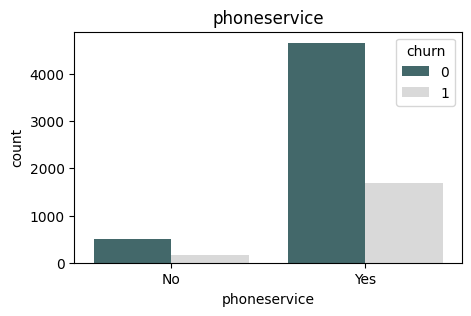

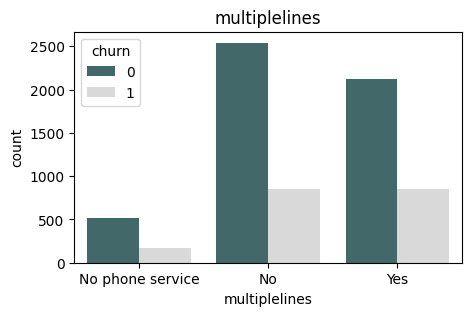

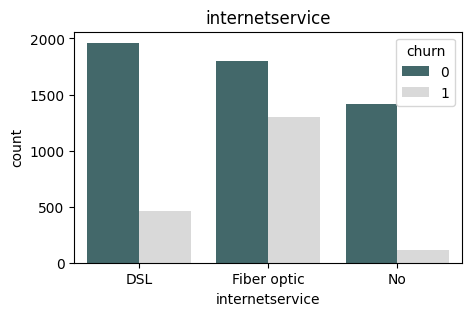

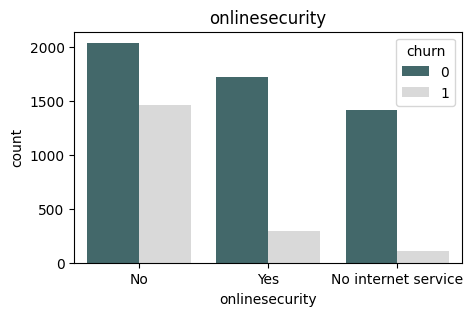

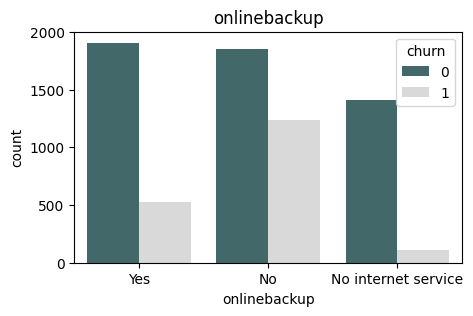

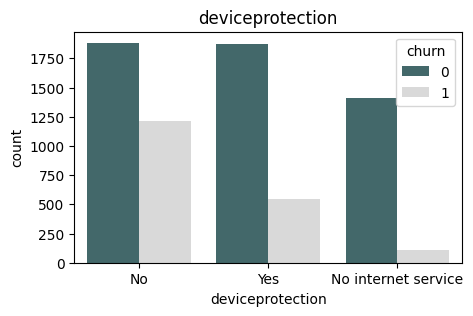

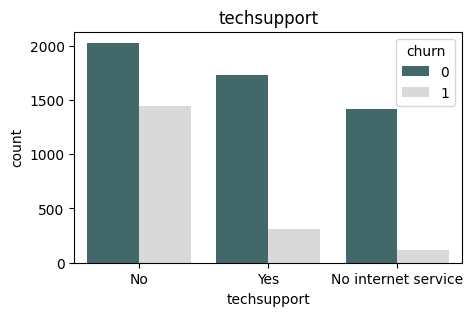

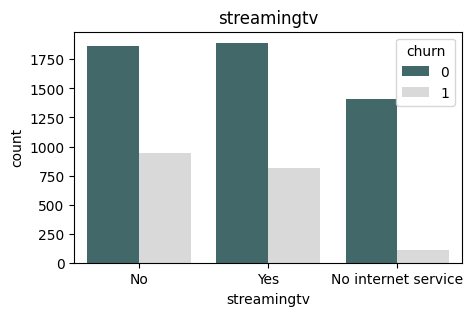

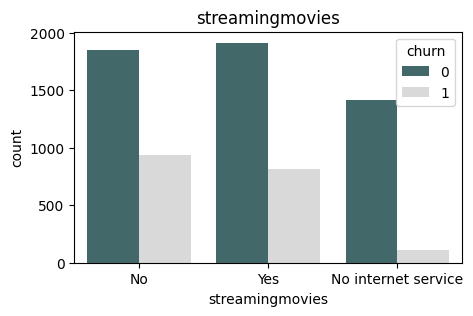

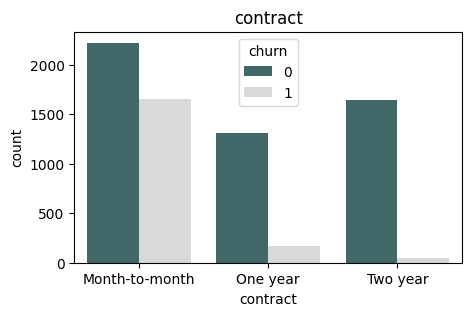

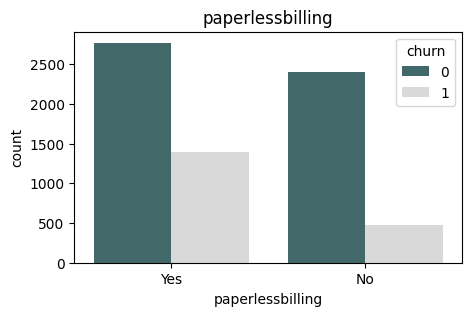

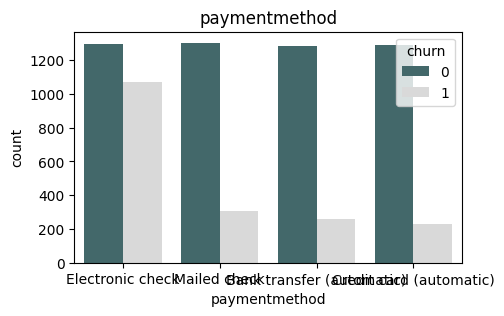

In [ ]:
colors = {'Yes': '#d9d9d9', 'No': '#3c6e71'}
palette = {0: '#3c6e71', 1: '#d9d9d9'}
for i,col in enumerate(categorical_cols):
    plt.figure(i, figsize=(5, 3))
    sns.countplot(data=df, x=col, hue='churn', palette=palette) # Use the palette dictionary here
    plt.title(col)
    plt.show()

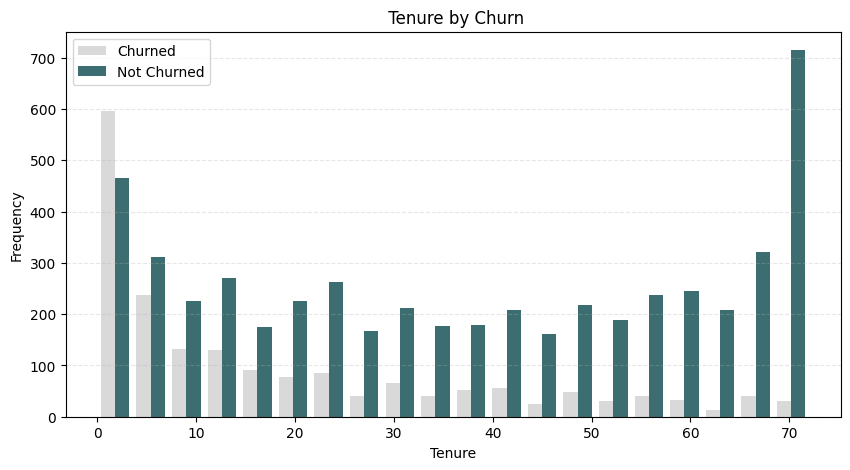

In [ ]:
#Visualise numeric features
#tenure
churned=df[df["churn"]==1]
not_churned=df[df["churn"]==0]

plt.figure(figsize=(10,5))
plt.hist([churned["tenure"],not_churned["tenure"]],bins=20,label=["Churned","Not Churned"],color=['#d9d9d9','#3c6e71'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

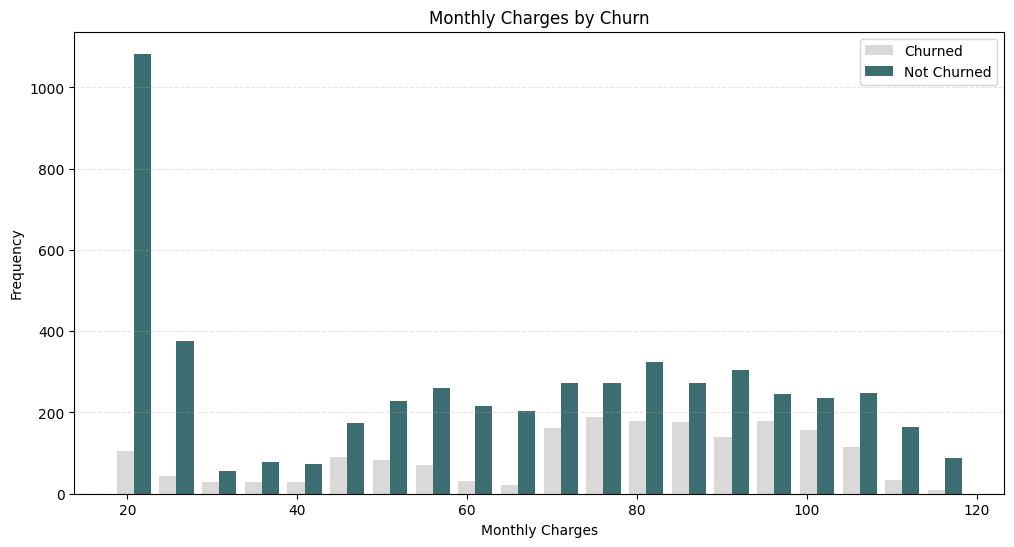

In [ ]:
#Monthly charge
churned=df[df["churn"]==1]
not_churned=df[df["churn"]==0]

plt.figure(figsize=(12,6))
plt.hist([churned["monthlycharges"],not_churned["monthlycharges"]],bins=20,label=["Churned","Not Churned"],color=['#d9d9d9','#3c6e71'])
plt.title('Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)


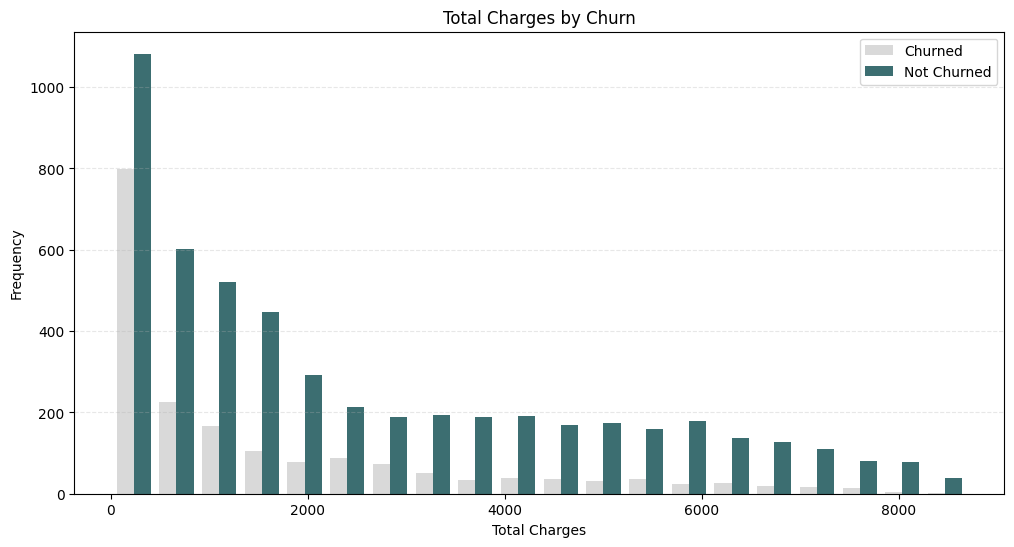

In [ ]:
#Total charge
churned=df[df["churn"]==1]
not_churned=df[df["churn"]==0]

plt.figure(figsize=(12,6))
plt.hist([churned["totalcharges"],not_churned["totalcharges"]],bins=20,label=["Churned","Not Churned"],color=['#d9d9d9','#3c6e71'])
plt.title('Total Charges by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

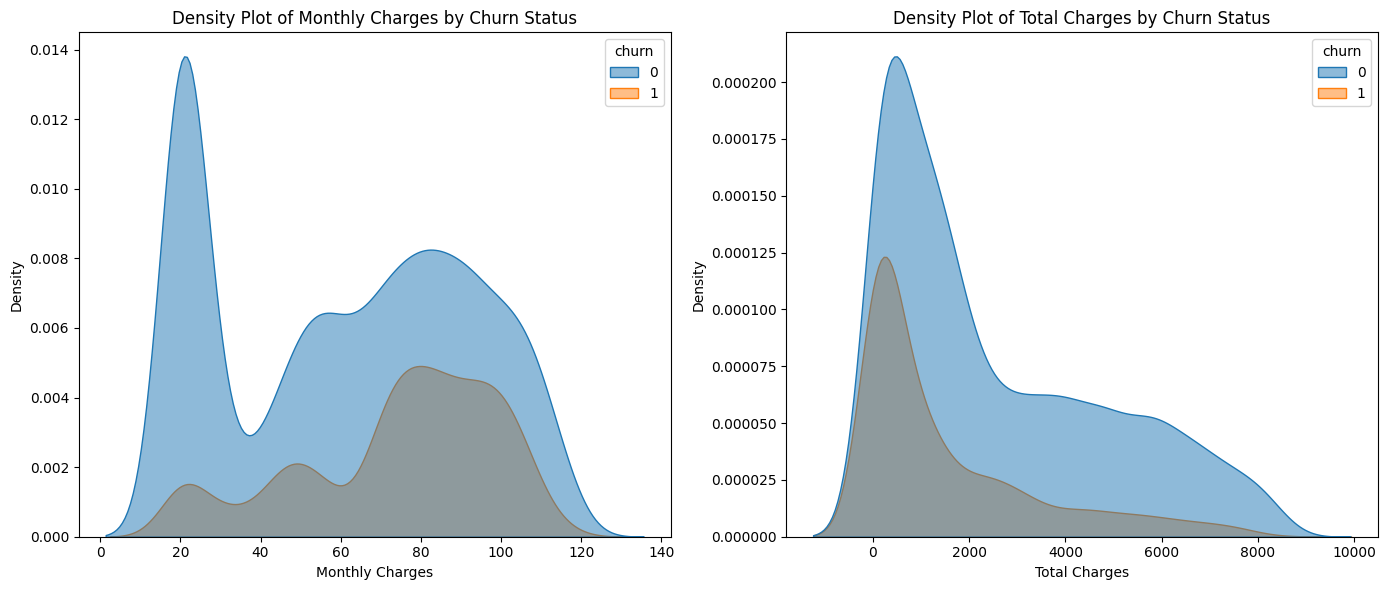

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Monthly Charges
sns.kdeplot(data=df, x="monthlycharges", hue="churn", fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# Plot for Total Charges
sns.kdeplot(data=df, x="totalcharges", hue="churn", fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('Density Plot of Total Charges by Churn Status')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

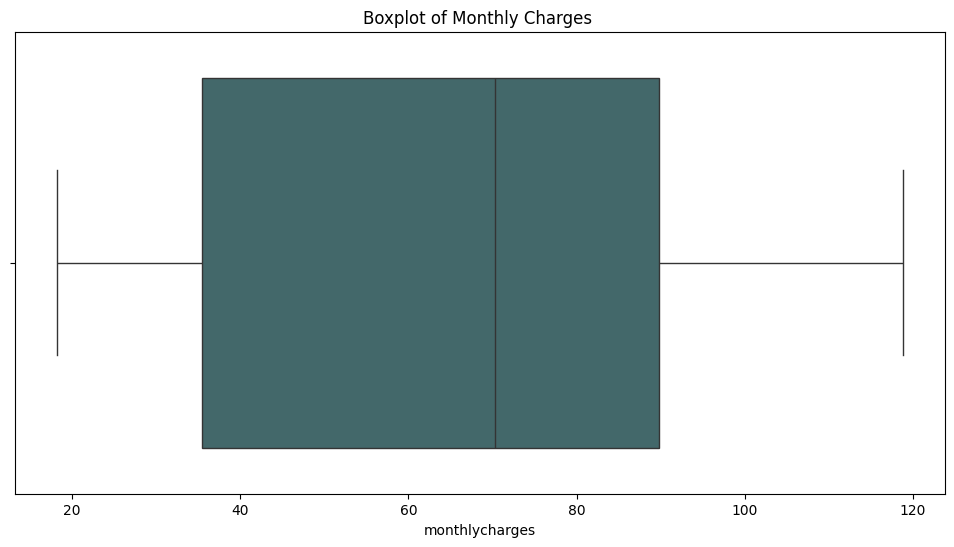

In [ ]:
#Check Outliers Using Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="monthlycharges",palette=['#3c6e71','#d9d9d9'])
plt.title('Boxplot of Monthly Charges ')
plt.show()

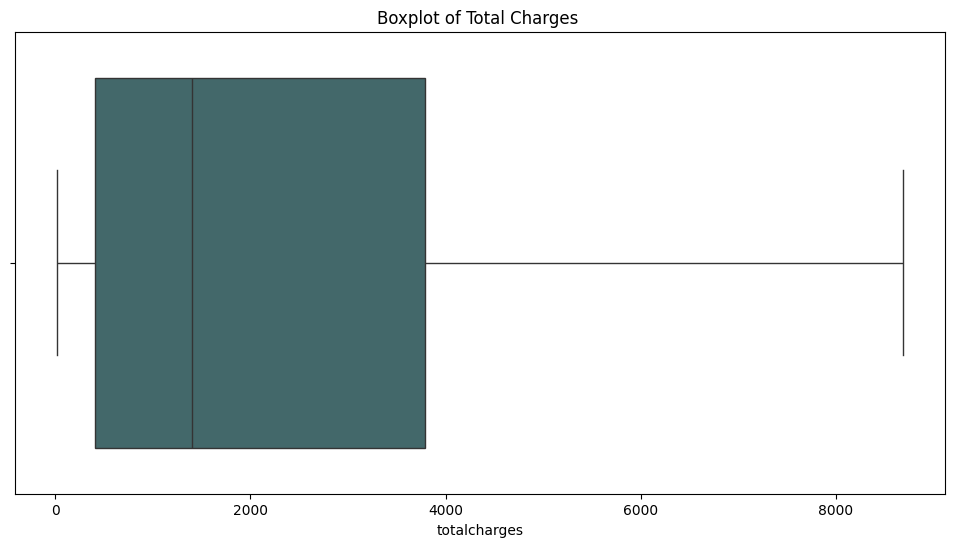

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="totalcharges",palette=['#3c6e71','#d9d9d9'])
plt.title('Boxplot of Total Charges ')
plt.show()

<Axes: xlabel='monthlycharges', ylabel='totalcharges'>

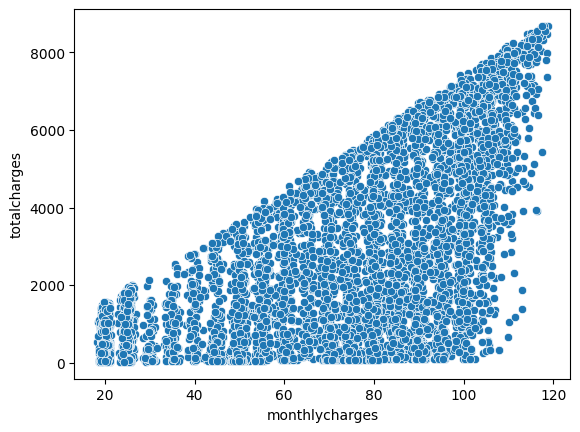

In [ ]:
sns.scatterplot(data=df,x=numerical_cols[1],y=numerical_cols[2])

**Encode The Data By LabelEncoder**

In [ ]:
le=LabelEncoder()
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])

df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**ML Model**

In [ ]:
x=df.drop("churn",axis=1)
y=df["churn"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_predlr=lr.predict(x_test)

In [ ]:
lr_accuracy=accuracy_score(y_test,y_predlr)
lr_accuracy

0.79649787032655

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_predlr))
print('-'*30)
model.score(x_test, y_test)*100

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1560
           1       0.63      0.54      0.58       553

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.72      2113
weighted avg       0.79      0.80      0.79      2113

------------------------------


79.46048272598202

In [ ]:
parm_rf={'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2']

    }

grid_rf=GridSearchCV(RandomForestClassifier(),parm_rf,cv=5)
grid_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]})

In [ ]:
grid_rf.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}

In [ ]:
rf=RandomForestClassifier(max_depth=10,n_estimators=100,max_features='sqrt')
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
y_predrf=rf.predict(x_test)

In [ ]:
acc_rf=rf.score(x_test,y_test)
acc_rf

0.8012304779933743

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_predrf))
print('-'*30)
print('Accuracy= ',acc_rf*100)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1560
           1       0.65      0.53      0.58       553

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

------------------------------
Accuracy=  80.12304779933743


In [ ]:
from xgboost import XGBClassifier
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid_xg=GridSearchCV(XGBClassifier(),param_grid=params,cv=5,n_jobs=-1,verbose=3)
grid_xg.fit(x_train,y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=3)

In [ ]:
grid_xg.best_params_

{'colsample_bytree': 0.8,
 'gamma': 5,
 'max_depth': 4,
 'min_child_weight': 5,
 'subsample': 0.8}

In [ ]:
xgb=XGBClassifier(colsample_bytree=0.8,gamma=5,max_depth=4,min_child_weight=5,subsample=0.8)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_predxgb=xgb.predict(x_test)

In [ ]:
acc_xgb=xgb.score(x_test,y_test)
acc_xgb

0.7983909133932797

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_predxgb))
print('-'*30)
print('Accuracy= ',acc_xgb*100)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1560
           1       0.63      0.55      0.59       553

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

------------------------------
Accuracy=  79.83909133932798


In [ ]:
print('Accuracy of Logistic Regression : ',lr_accuracy*100)
print('Accuracy of Random Forest : ',acc_rf*100)
print('Accuracy of XGBoost : ',acc_xgb*100)

Accuracy of Logistic Regression :  79.649787032655
Accuracy of Random Forest :  80.12304779933743
Accuracy of XGBoost :  79.83909133932798
